# Wine Quality Analysis

In [3]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipultion tool

## Loading Data


In [4]:
# In read_csv() function, we have passed the location to where the files are located in the UCI website. The data is separated by ';'
# so we used separator as ';' (sep = ";")
red_wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
white_wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")

In [5]:
# Red Wine
red_wine_data.head()    # we can also pass the number of records we want in the brackets (). By default it displays first 5 records.

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [6]:
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
white_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
# White Wine
white_wine_data.head(6)      # we will get first 6 records from white wine data

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6
5            8.1              0.28         0.40  ...       0.44     10.1        6

[6 rows x 12 columns]

In [9]:
red_wine_data.iloc[100:110]

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
100            8.3             0.610         0.30  ...       0.61     10.2        6
101            7.8             0.500         0.30  ...       0.56     10.4        6
102            8.1             0.545         0.18  ...       0.59      9.0        6
103            8.1             0.575         0.22  ...       0.51      9.2        5
104            7.2             0.490         0.24  ...       0.48      9.4        5
105            8.1             0.575         0.22  ...       0.51      9.2        5
106            7.8             0.410         0.68  ...       1.31      9.3        5
107            6.2             0.630         0.31  ...       0.79      9.3        5
108            8.0             0.330         0.53  ...       0.80      9.6        6
109            8.1             0.785         0.52  ...       0.69      9.3        5

[10 rows x 12 columns]

In [10]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
white_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [12]:
# Columns / Attribute
red_wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Target Variable:
The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding. It is the variable that is, or should be the output.

Here **quality** is the target variable as we're trying to know which of the two types of wines have a better quality.




### Input Variables:
One or more variables that are used to determine (or predict) the 'Target Variable' are known as Input Variables. They are sometimes called Predictor Variable as well.

the input variables are: 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', and 'alcohol'. 



## Exploratory Data Analysis (EDA)


Concatenate both the data.

In [13]:
# Add a column to separate whether the wine is red or white.
red_wine_data['color'] = 'r'
white_wine_data['color'] = 'w'


In [14]:
wine_data = pd.concat([red_wine_data, white_wine_data])

In [15]:
wine_data.head()

fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  color
0            7.4              0.70         0.00  ...      9.4        5      r
1            7.8              0.88         0.00  ...      9.8        5      r
2            7.8              0.76         0.04  ...      9.8        5      r
3           11.2              0.28         0.56  ...      9.8        6      r
4            7.4              0.70         0.00  ...      9.4        5      r

[5 rows x 13 columns]

In [38]:
wine_data.tail()

fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  color
4893            6.2              0.21         0.29  ...     11.2        6      w
4894            6.6              0.32         0.36  ...      9.6        5      w
4895            6.5              0.24         0.19  ...      9.4        6      w
4896            5.5              0.29         0.30  ...     12.8        7      w
4897            6.0              0.21         0.38  ...     11.8        6      w

[5 rows x 13 columns]

In [44]:
wine_data.quality.unique()

array([5, 6, 7, 4, 8, 3, 9])

In [16]:
red_wine_data.head(2)

fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  color
0            7.4              0.70          0.0  ...      9.4        5      r
1            7.8              0.88          0.0  ...      9.8        5      r

[2 rows x 13 columns]

In [17]:
# concise summary about dataset
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  color                 1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [18]:
white_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  color                 4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


It is always interesting to know the basic statistical characteristics of each numerical variables.

In [19]:
# Basic Statistical details 
red_wine_data.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

In [20]:
white_wine_data.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    4898.000000       4898.000000  ...  4898.000000  4898.000000
mean        6.854788          0.278241  ...    10.514267     5.877909
std         0.843868          0.100795  ...     1.230621     0.885639
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.300000          0.210000  ...     9.500000     5.000000
50%         6.800000          0.260000  ...    10.400000     6.000000
75%         7.300000          0.320000  ...    11.400000     6.000000
max        14.200000          1.100000  ...    14.200000     9.000000

[8 rows x 12 columns]

Let's explore different statistical measures that we have got from desribe().


*   **count:** total count of non-null values in the column
*   **mean**: the average of all the values in that column
*   **min:** the minimum value in the column
*   **max:** the maximum value in the column
*   **25%:** first quartile in the column after we arrange those values in ascending order
*   **50%:** this is the median or the second quartile
*   **75%:** the third quartile 
*   **std:** this is the standard deviation (i.e. measure of depreciation, you must have read in the basics of statistics study material)

**Note:** 25%, 50%, and 75% are nothing but corresponding percentile values


Our brains are good at spotting patterns in pictures. Let's play around different types of data visualizations.

##**Analysis of Red Wine**

In [21]:
# first import data visualizations libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
# In read_csv() function, we have passed the location to where the files are located in the UCI website. The data is separated by ';'
# so we used separator as ';' (sep = ";")
red_wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
white_wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")

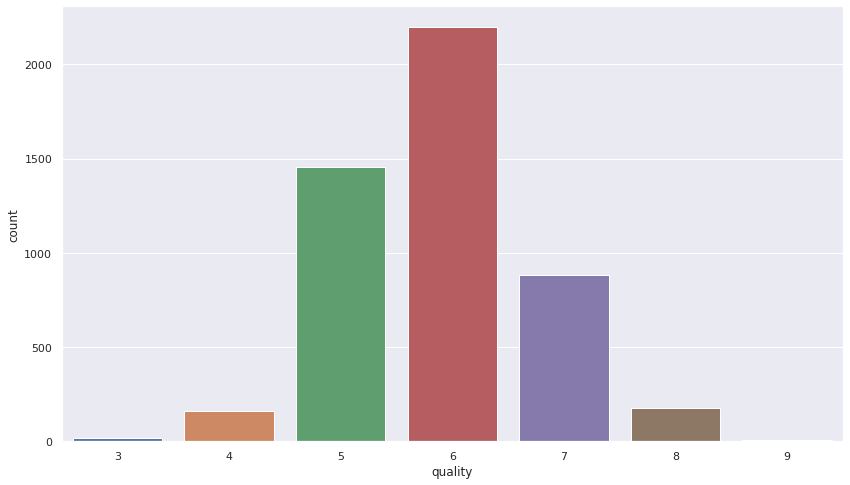

In [23]:
sns.set(rc={'figure.figsize':(14,8)})
sns.countplot(white_wine_data['quality'])

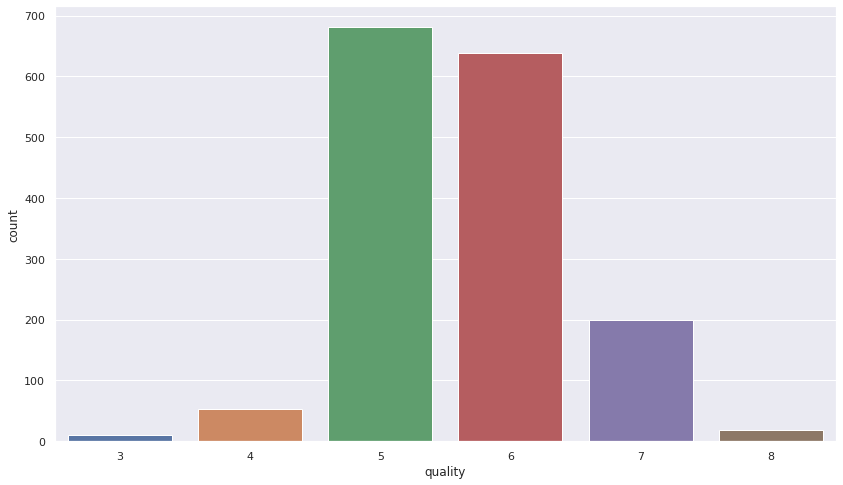

In [24]:
sns.countplot(red_wine_data['quality'])

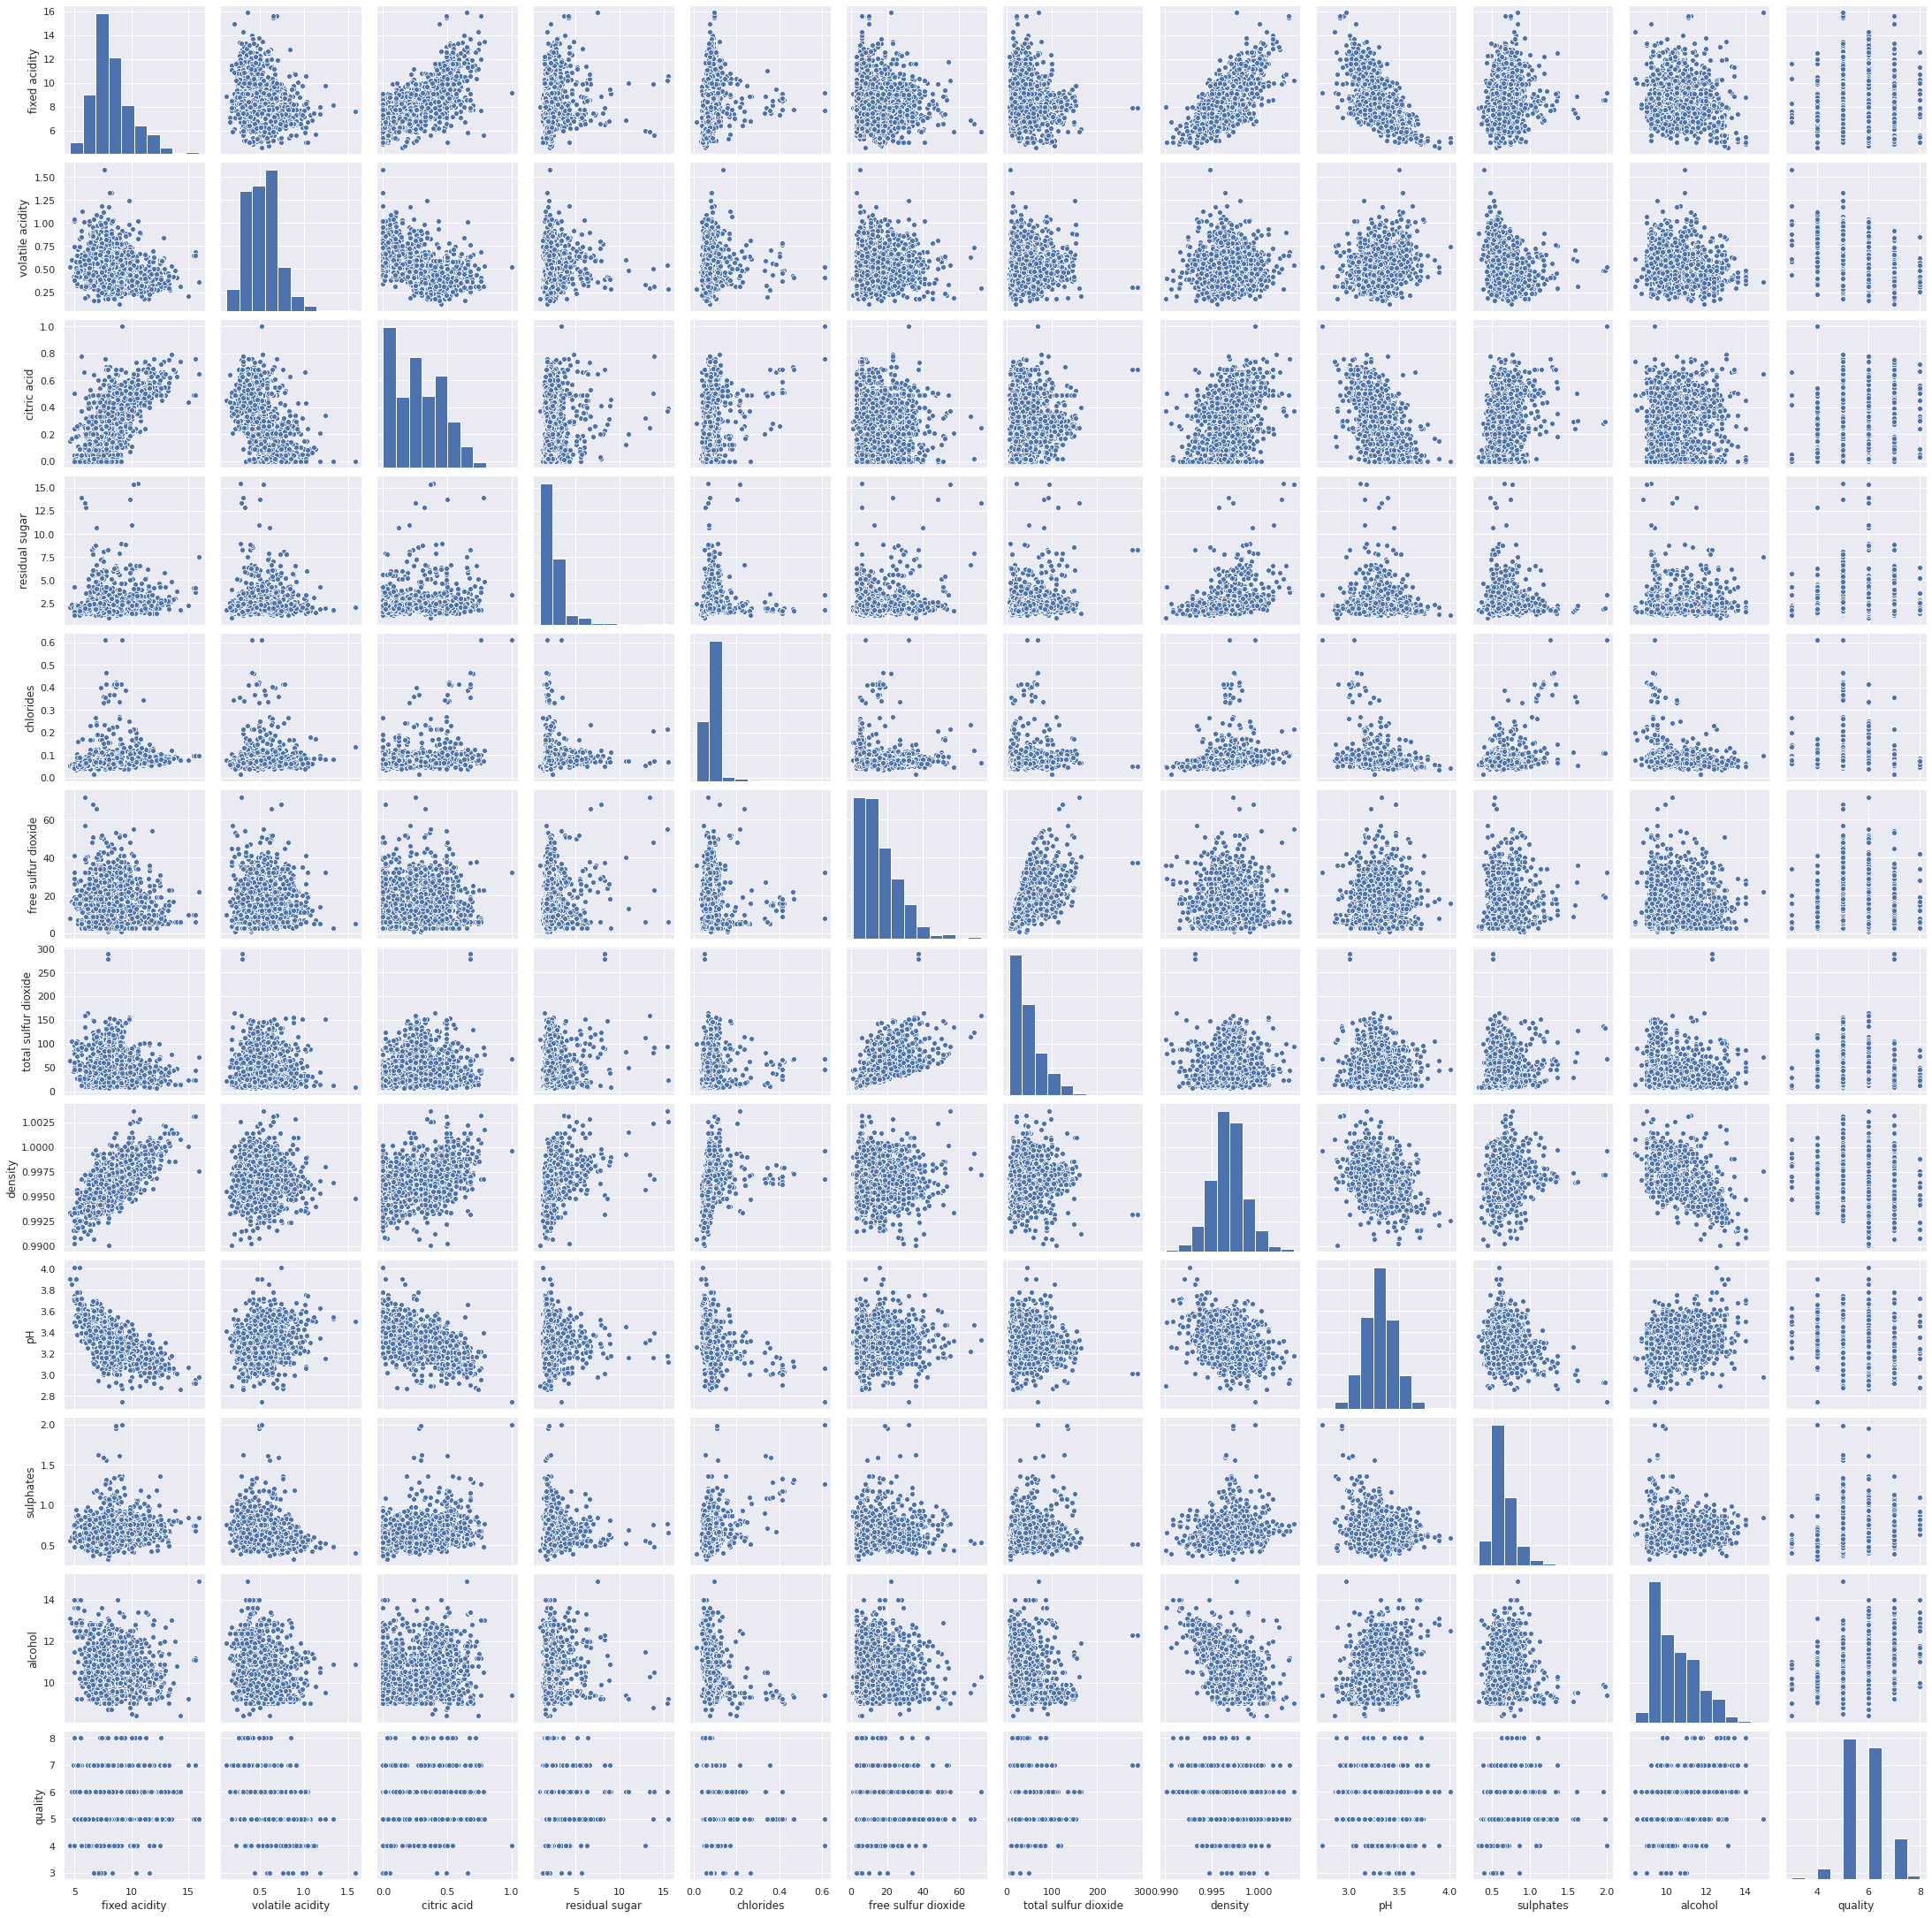

In [25]:
sns.pairplot(red_wine_data)

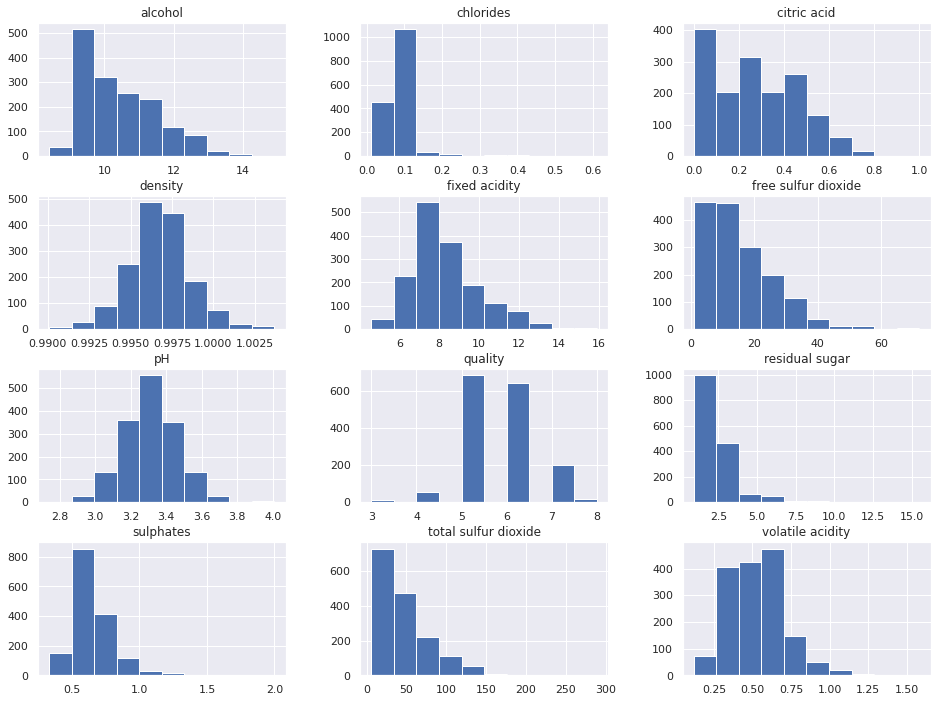

In [26]:
# red wines      
red_wine_data.hist(bins=10, figsize=(16,12))
plt.show()

The distribution of the attribute seems to be positively skewed. The attributes '**density**' and '**pH**' are quite normally distributed (you must have read about normal distribution in basic statistics study material). Now looking at the attribute **quality**, we can observe that the wines with average quality (i.e. quality rating 5 to 7) are more than bad and good quality of wines.

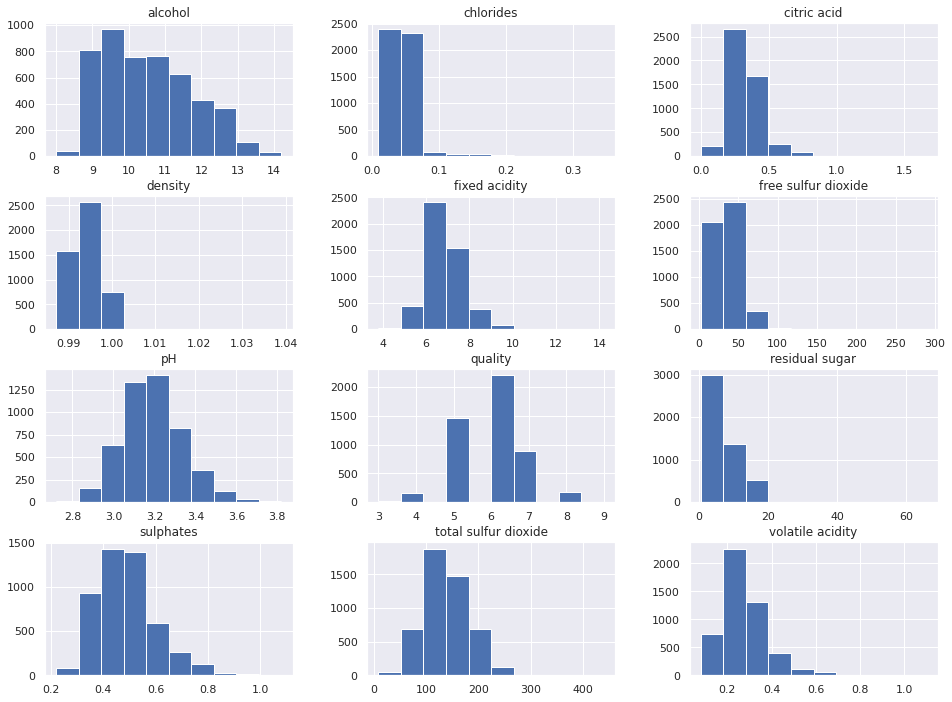

In [27]:
# white wine
white_wine_data.hist(bins=10, figsize=(16,12))
plt.show()

For white wines, the attribute '**pH**' is quite normally distributed. The average **quality** of wines are more than good and bad qualities of wines for white wine data too. Most of the wines seem to be containing **alcohol** percentage in the range 8.5% to nearly 13%.

In [28]:
# Creating pivot table for red wine
columns = list(red_wine_data.columns).remove('quality')
red_wine_data.pivot_table(columns, ['quality'], aggfunc=np.median)    # By default the aggfunc is mean

alcohol  chlorides  ...  total sulfur dioxide  volatile acidity
quality                      ...                                        
3          9.925     0.0905  ...                  15.0             0.845
4         10.000     0.0800  ...                  26.0             0.670
5          9.700     0.0810  ...                  47.0             0.580
6         10.500     0.0780  ...                  35.0             0.490
7         11.500     0.0730  ...                  27.0             0.370
8         12.150     0.0705  ...                  21.5             0.370

[6 rows x 11 columns]

In [29]:
# Creating pivot table for red wine
columns = list(white_wine_data.columns).remove('quality')
white_wine_data.pivot_table(columns, ['quality'], aggfunc=np.median)

alcohol  chlorides  ...  total sulfur dioxide  volatile acidity
quality                      ...                                        
3          10.45      0.041  ...                 159.5              0.26
4          10.10      0.046  ...                 117.0              0.32
5           9.50      0.047  ...                 151.0              0.28
6          10.50      0.043  ...                 132.0              0.25
7          11.40      0.037  ...                 122.0              0.25
8          12.00      0.036  ...                 122.0              0.26
9          12.50      0.031  ...                 119.0              0.27

[7 rows x 11 columns]

We can check how each features are reated with others using corr() function.

In [30]:
# red wines
red_wine_data.corr()

fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000         -0.256131  ... -0.061668  0.124052
volatile acidity          -0.256131          1.000000  ... -0.202288 -0.390558
citric acid                0.671703         -0.552496  ...  0.109903  0.226373
residual sugar             0.114777          0.001918  ...  0.042075  0.013732
chlorides                  0.093705          0.061298  ... -0.221141 -0.128907
free sulfur dioxide       -0.153794         -0.010504  ... -0.069408 -0.050656
total sulfur dioxide      -0.113181          0.076470  ... -0.205654 -0.185100
density                    0.668047          0.022026  ... -0.496180 -0.174919
pH                        -0.682978          0.234937  ...  0.205633 -0.057731
sulphates                  0.183006         -0.260987  ...  0.093595  0.251397
alcohol                   -0.061668         -0.202288  ...  1.000000  0.476166
quality                    0.124052         -0.390558  ...  0.476166  1.000000

[12 rows x 12 columns]

From the above correlation matrix, we can observe that there is a relatively high positive correlation between **fixed_acidity** and **citric_acid**, **fixed_acidity** and **density**. Similarly we can observe there is a relatively high negative correlation between **fixed_acidity** and **pH**. There is relatively high positive correlation between **alcohol** presence and quality of the wines.

In [31]:
# white wines
white_wine_data.corr()

fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000         -0.022697  ... -0.120881 -0.113663
volatile acidity          -0.022697          1.000000  ...  0.067718 -0.194723
citric acid                0.289181         -0.149472  ... -0.075729 -0.009209
residual sugar             0.089021          0.064286  ... -0.450631 -0.097577
chlorides                  0.023086          0.070512  ... -0.360189 -0.209934
free sulfur dioxide       -0.049396         -0.097012  ... -0.250104  0.008158
total sulfur dioxide       0.091070          0.089261  ... -0.448892 -0.174737
density                    0.265331          0.027114  ... -0.780138 -0.307123
pH                        -0.425858         -0.031915  ...  0.121432  0.099427
sulphates                 -0.017143         -0.035728  ... -0.017433  0.053678
alcohol                   -0.120881          0.067718  ...  1.000000  0.435575
quality                   -0.113663         -0.194723  ...  0.435575  1.000000

[12 rows x 12 columns]

We can plot the above correlation matrix using heatmaps too. The visualization using heatmap is a pictorial visualization.

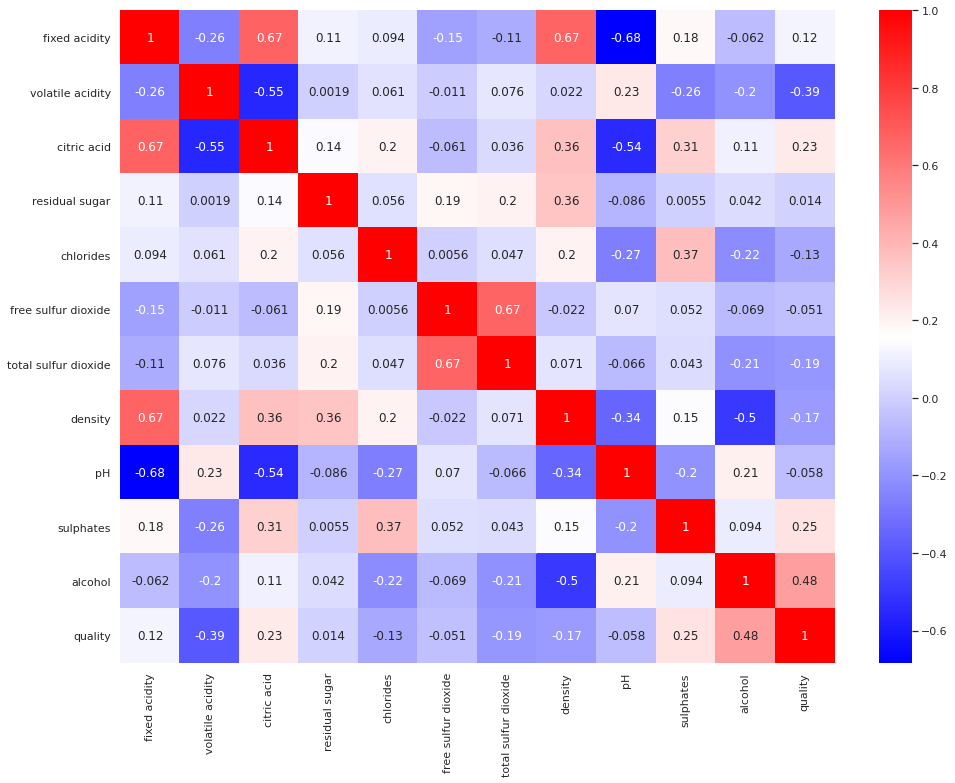

In [32]:
# red wines
plt.figure(figsize=(16, 12))
sns.heatmap(red_wine_data.corr(), cmap='bwr', annot=True)     # annot = True: to display the correlation value in the graph

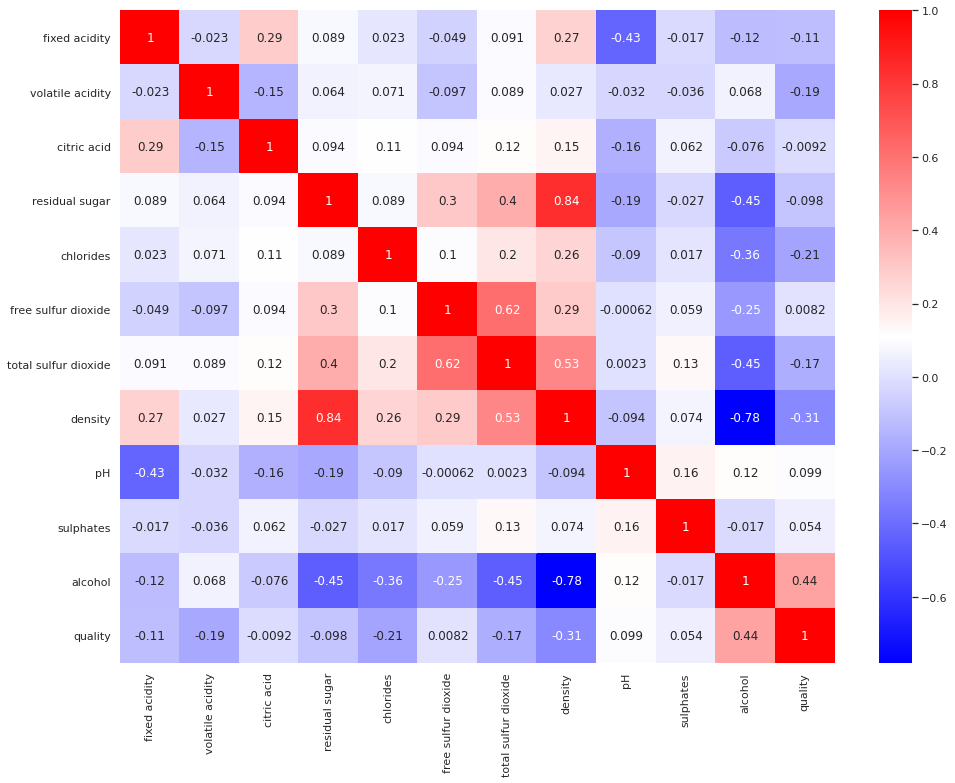

In [33]:
# white wines
plt.figure(figsize=(16, 12))
sns.heatmap(white_wine_data.corr(), cmap='bwr', annot=True)

#### Discrete Categorical Attributes
The attribute quality is categorical in nature and we can visualize this type of attributes using barplot or countplot.

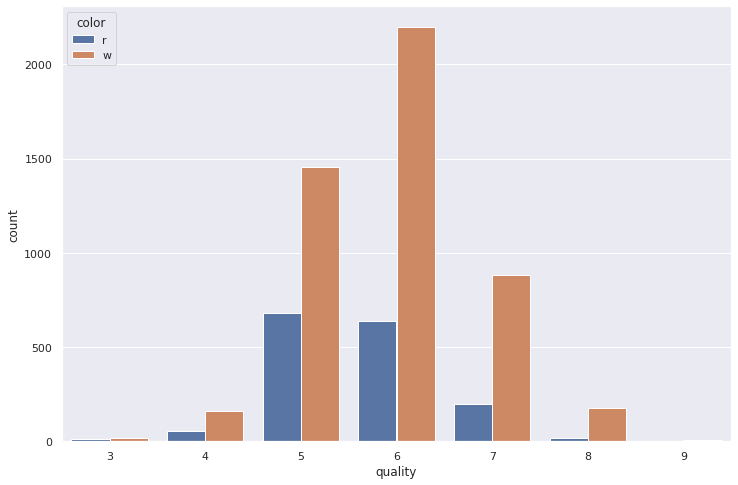

In [34]:
# Countplot for quality of wines present in different category of wines (red and white)
plt.figure(figsize=(12,8))
sns.countplot(wine_data.quality, hue=wine_data.color)

From above countplot, we can observe that the average quality of wines are more than good and bad quality of wines in both variants of wines. 

We can visualize scatterplot matrix for the better understanding relationship between a pair of variables. It plots every numerical attribute against every other. 'pairplot' of seaborn helps to achieve this

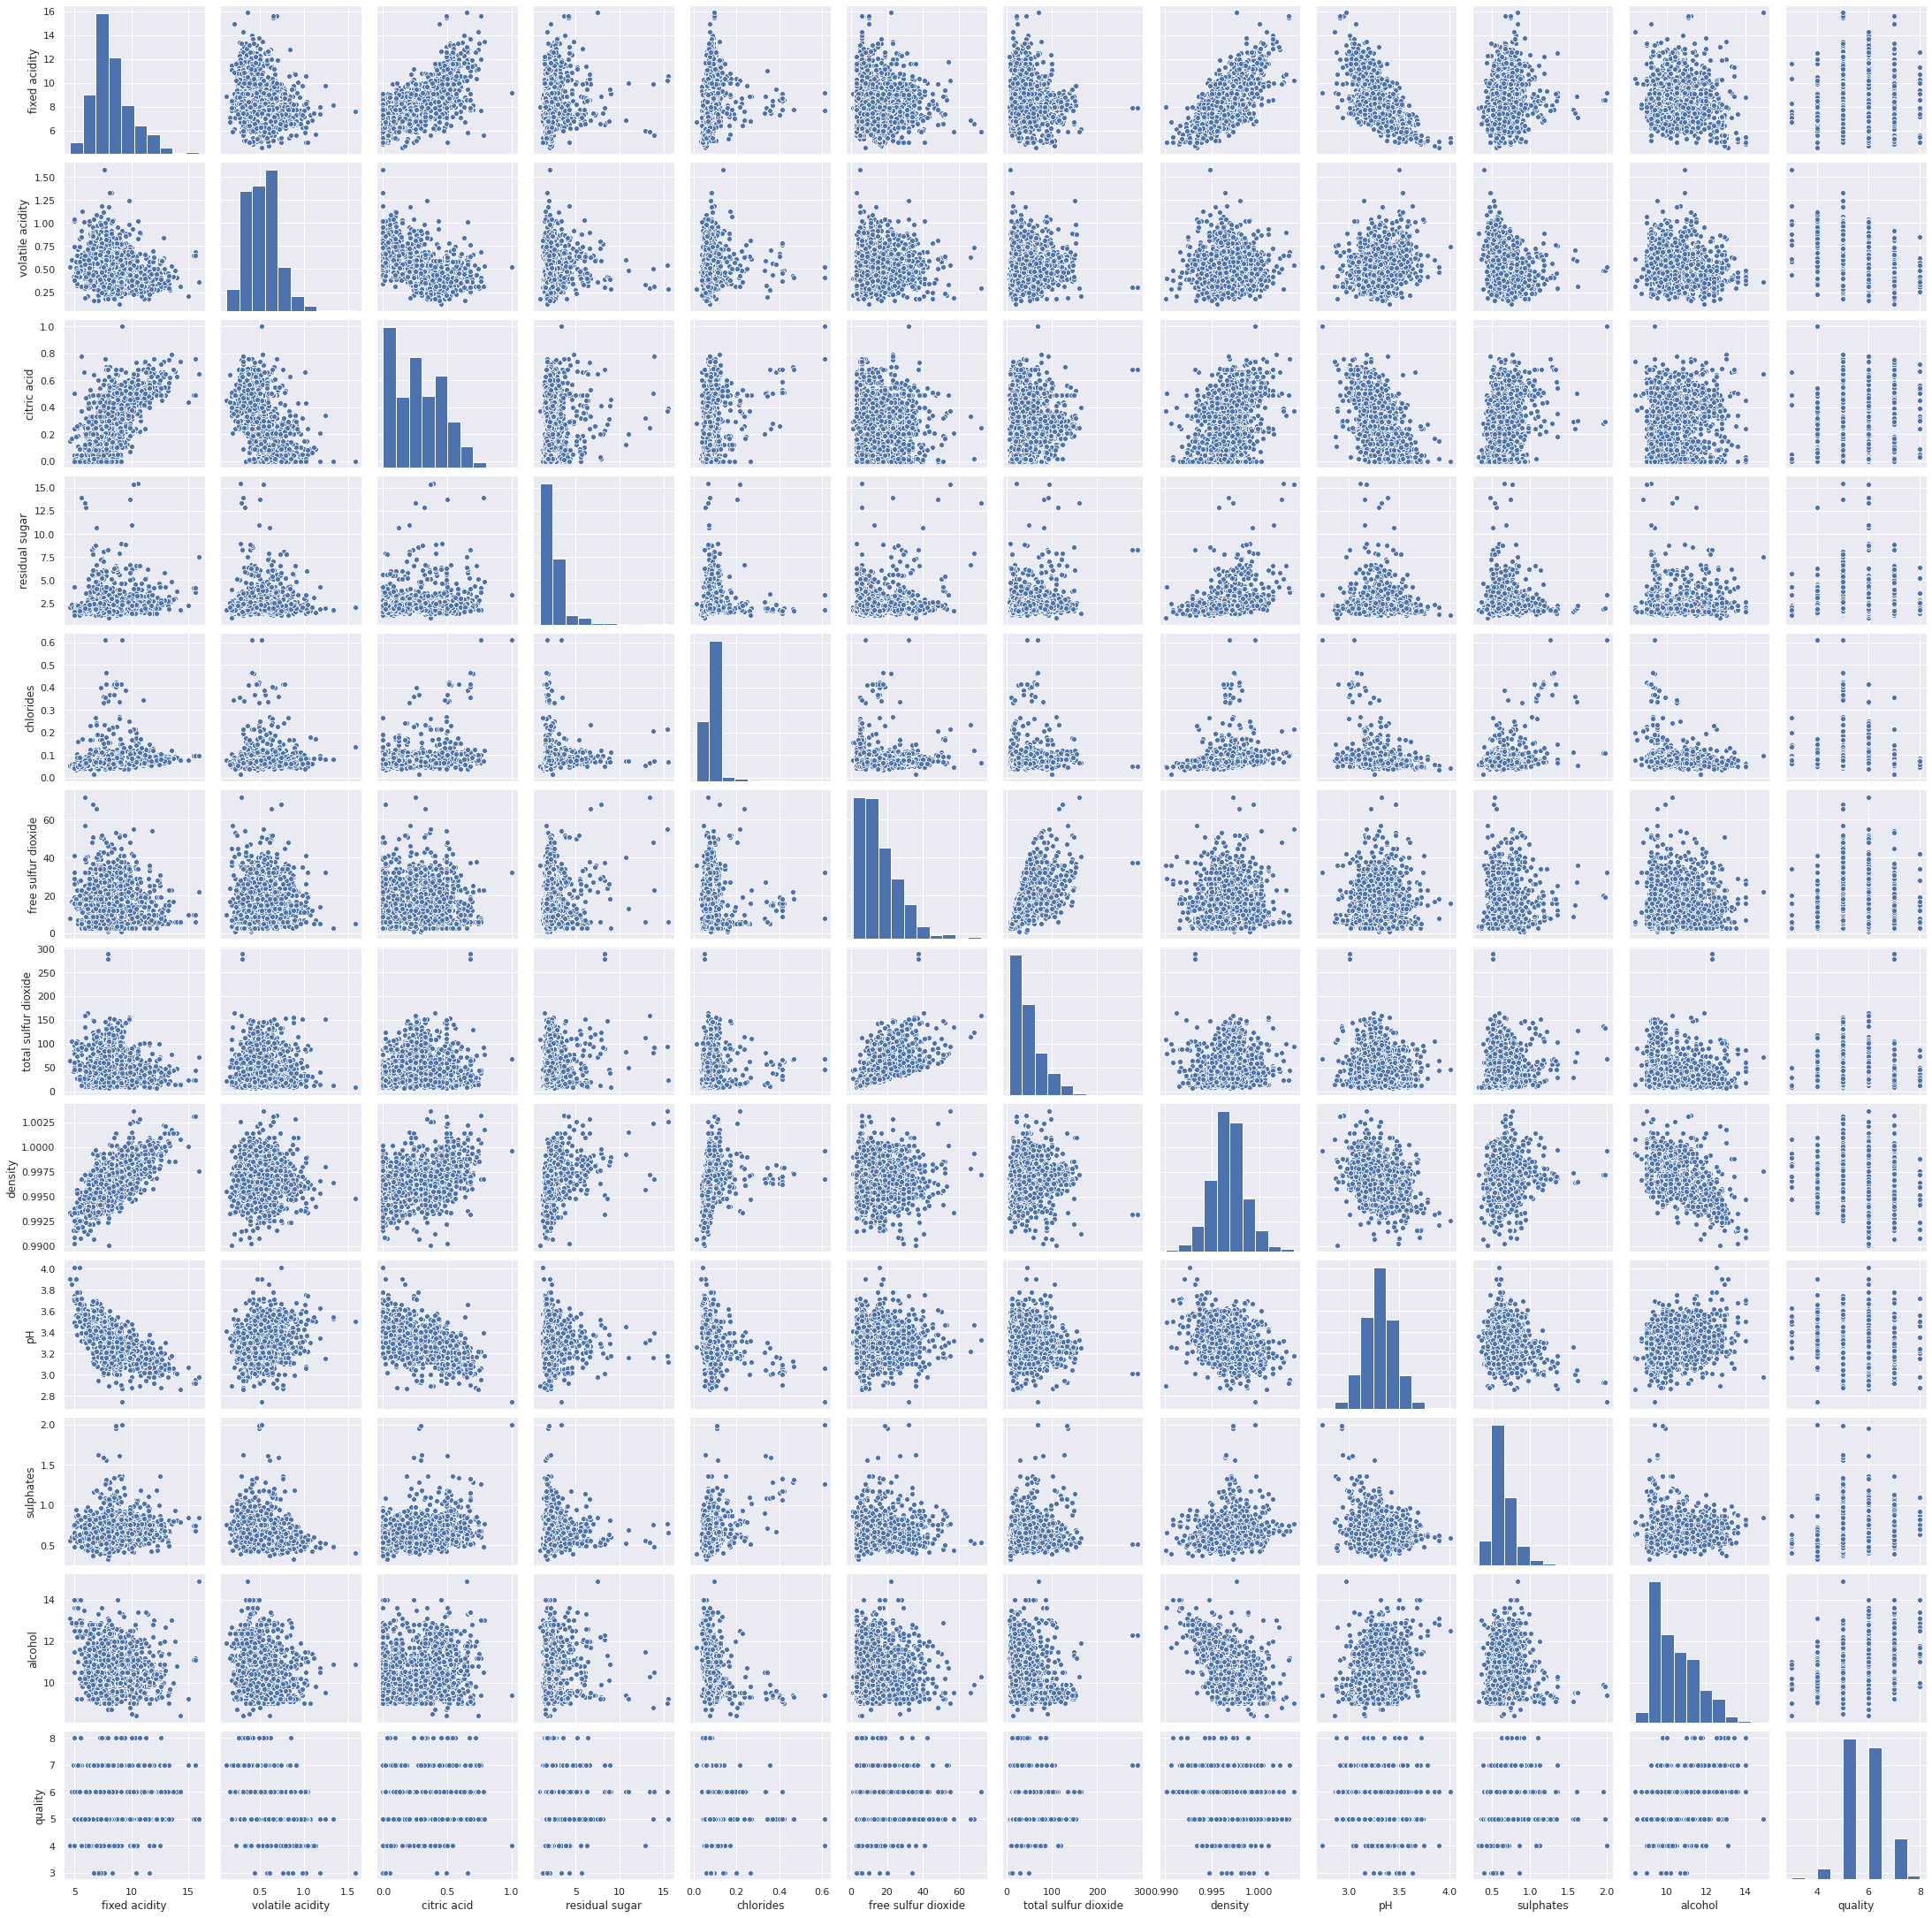

In [35]:
# red wine
sns.pairplot(red_wine_data)

The correlation between **fixed_acidity** and **citric_acid** is 0.67 (you could find this value in the correlation matrix of red wines). Looking for scatterplot for this pair of variables, we can see the positive linear correlation between these two variables. We can observe the upward trend, and also the points are not too dispersed.

Similarly we can plot scatter plot between variables for white wines.

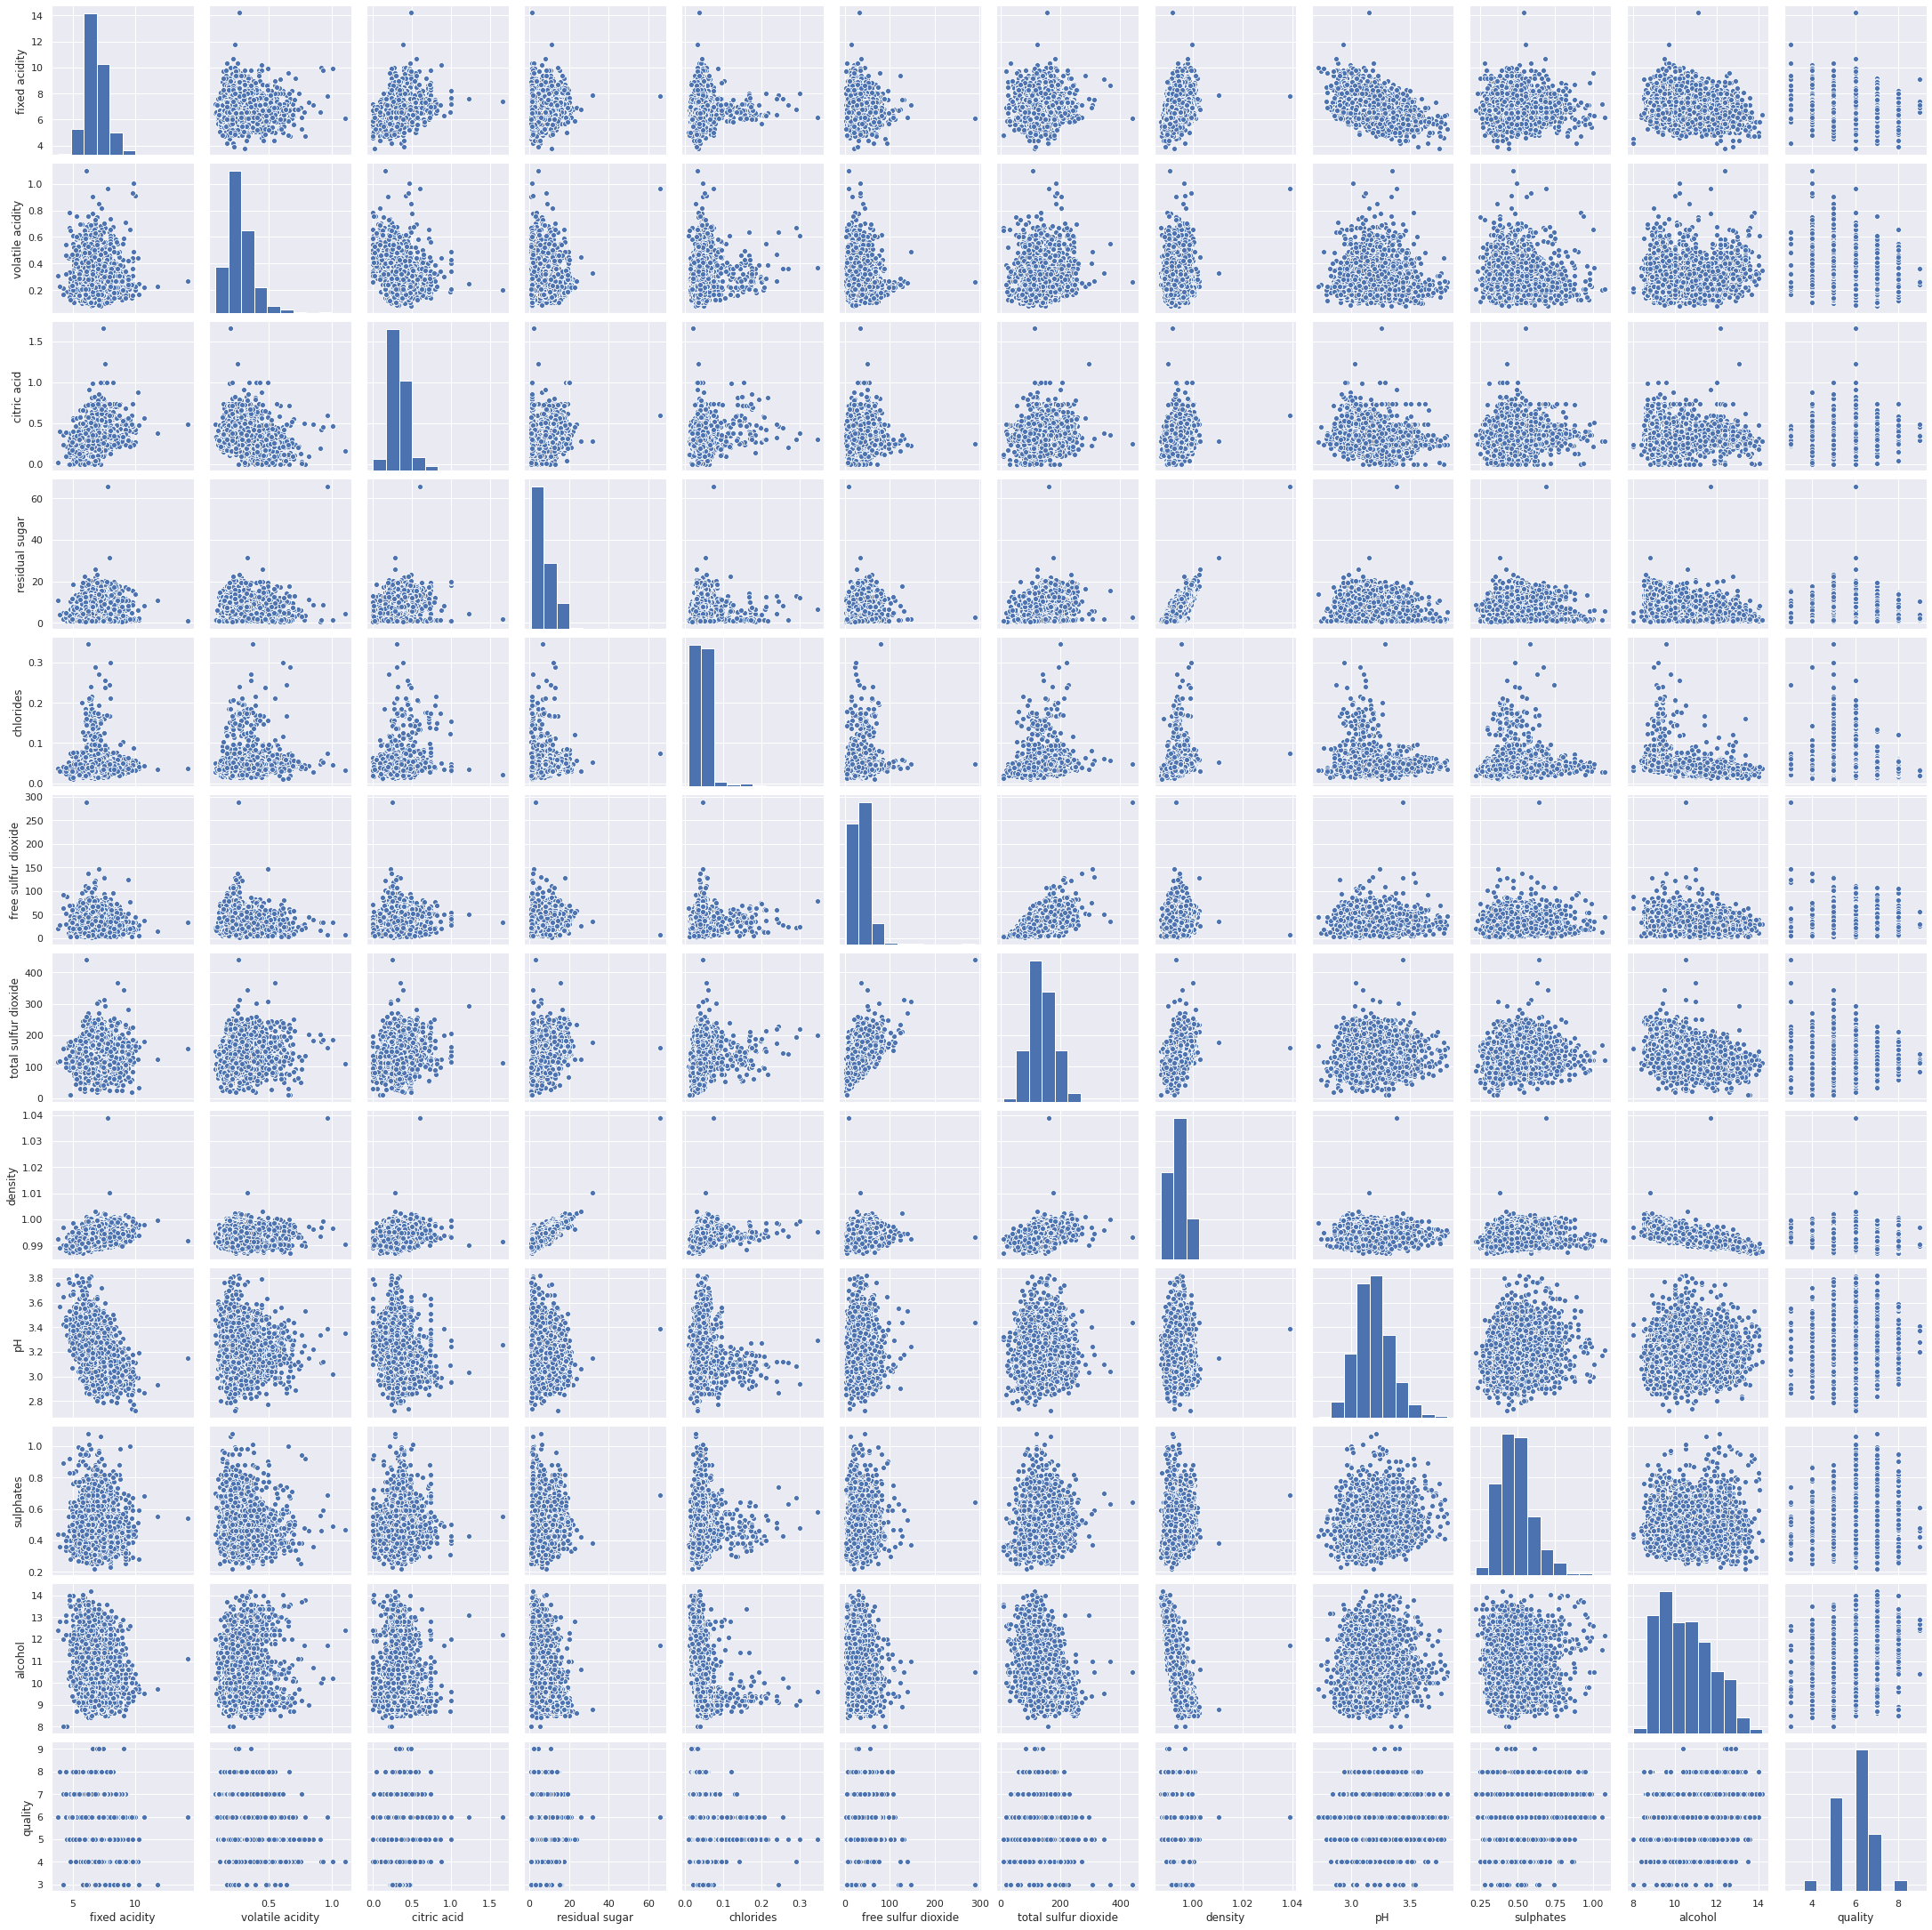

In [36]:
# Pairplot
sns.pairplot(white_wine_data)

In [47]:
wine_data['color']=wine_data['color'].apply(lambda x:1 if x=='r' else 0)

In [50]:
wine_data.head()

fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  color
0            7.4              0.70         0.00  ...      9.4        5      1
1            7.8              0.88         0.00  ...      9.8        5      1
2            7.8              0.76         0.04  ...      9.8        5      1
3           11.2              0.28         0.56  ...      9.8        6      1
4            7.4              0.70         0.00  ...      9.4        5      1

[5 rows x 13 columns]

# Splitting Train and Test dataset

In [51]:
x=wine_data.drop(['quality'],axis=1)
y=wine_data.quality

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [54]:
np.shape(x_train)

(5197, 12)

In [55]:
np.shape(x_test)

(1300, 12)

# Building Model

In [56]:
from sklearn.linear_model import LinearRegression

In [71]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred=np.round(y_pred,0)

In [73]:
y_pred

array([7., 5., 6., ..., 7., 5., 6.])

In [74]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.1563473445371688

In [75]:
yy=y_test-y_pred
yy

1504    1.0
1419    0.0
3162    1.0
3091    0.0
2433    1.0
       ... 
889     0.0
1251    0.0
3318    0.0
3599    1.0
4044    1.0
Name: quality, Length: 1300, dtype: float64

In [76]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.5123076923076924

In [77]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))

Mean Squared Error:  0.6230769230769231


In [78]:
print("Root Mean Squared Error: ",mean_squared_error(y_test, y_pred, squared=False))

Root Mean Squared Error:  0.7893522173763263


In [79]:
from sklearn.model_selection import cross_validate

In [85]:
from sklearn.metrics import SCORERS
key=SCORERS.keys()
key

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [87]:
cv_results = cross_validate(lr, x, y, cv=10, scoring=['r2','neg_mean_squared_error','neg_mean_absolute_error','neg_root_mean_squared_error'])  # cv - cross validate for 10 times 
cv_results

{'fit_time': array([0.01086283, 0.0074389 , 0.0060997 , 0.00597   , 0.00594449,
        0.00603366, 0.00634432, 0.00586891, 0.00591826, 0.00567651]),
 'score_time': array([0.00450492, 0.00299931, 0.00299692, 0.00295472, 0.00295639,
        0.00343943, 0.00291634, 0.00274897, 0.0027616 , 0.00272226]),
 'test_neg_mean_absolute_error': array([-0.54580616, -0.51281098, -0.57566754, -0.65697268, -0.62762984,
        -0.57208624, -0.58761377, -0.57878877, -0.56706922, -0.52829215]),
 'test_neg_mean_squared_error': array([-0.4900461 , -0.44076052, -0.55177989, -0.70680951, -0.64845031,
        -0.54010419, -0.56301442, -0.54731311, -0.52027718, -0.48446084]),
 'test_neg_root_mean_squared_error': array([-0.70003293, -0.66389797, -0.74281888, -0.84071964, -0.80526413,
        -0.73491781, -0.75034287, -0.73980613, -0.72130242, -0.69603221]),
 'test_r2': array([0.21270177, 0.36292991, 0.24462452, 0.20259809, 0.27032523,
        0.21862335, 0.33865399, 0.29197893, 0.27207201, 0.14940061])}

In [88]:
print("R2_Score: ", cv_results["test_r2"].mean())
print("RMSE: ", cv_results["test_neg_root_mean_squared_error"].mean())
print("MAE: ", cv_results["test_neg_mean_absolute_error"].mean())
print("MSE: ", cv_results["test_neg_mean_squared_error"].mean())


R2_Score:  0.25639083976284494
RMSE:  -0.7395134981978029
MAE:  -0.5752737366910254
MSE:  -0.5493016063429511


# Hyperparameter Tuning

## Grid Search CV

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False], 'n_jobs':[-1,1,10,15]}

In [100]:
grid = GridSearchCV(lr,parameters, cv=25)
grid.fit(x_train, y_train)

GridSearchCV(cv=25, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [-1, 1, 10, 15],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [101]:
grid.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [102]:
grid_lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
grid_lr.fit(x_train, y_train)
y_pred= grid_lr.predict(x_test)
mean_squared_error(y_test, y_pred, squared=False)

0.7356891017063923

**Performance does not vary that much!**

The number of hyperparameters for Linear Regression is very less. Hence all of them give similar performance (in this specific dataset)

Let us try another parameter for which the performance varies a lot!